# Round 3. Apply K-fold 

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [37]:
#The objective is to provide a confidence interval for the performance 
#of our model using K-fold cross validation



In [38]:
churnData2=pd.read_csv('churnData2')
churnData2.shape

(7043, 6)

In [39]:
churnData2

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,29.85,29.85,0
1,1,0,34,56.95,1889.50,0
2,2,0,2,53.85,108.15,1
3,3,0,45,42.30,1840.75,0
4,4,0,2,70.70,151.65,1
...,...,...,...,...,...,...
7038,7038,0,24,84.80,1990.50,0
7039,7039,0,72,103.20,7362.90,0
7040,7040,0,11,29.60,346.45,0
7041,7041,1,4,74.40,306.60,1


In [40]:
churnData2.drop(['Unnamed: 0'], axis = 1, inplace = True) 
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [41]:
#For it we need check if the values of the 'Churn' feature are balanced
churnData2['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [42]:
# As we can see there is a huge imbalance in the data in the representation
# of the two categories. Category 0 is represented 5174 times and category 1 is represented 1869 times.


## Let's try downsampling and upsampling to create a balance between the two classes

### Downsampling


In [43]:
category_0 = churnData2[churnData2['Churn'] == 0]
category_1 = churnData2[churnData2['Churn'] == 1]


In [44]:
print(category_0.shape)
print(category_1.shape)

(5174, 5)
(1869, 5)


In [45]:
category_0_down = category_0.sample(len(category_1))
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [46]:
churnData2 = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
churnData2 = churnData2.sample(frac=1)
churnData2['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [47]:
churnData2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
2829,1,8,69.70,560.85,1
6352,0,42,94.40,4014.60,0
883,0,67,111.25,7511.65,0
911,1,15,89.00,1288.30,0
3577,0,36,65.40,2498.40,1
...,...,...,...,...,...
2973,0,62,100.15,6283.30,1
1572,1,3,45.00,127.10,1
618,0,57,87.55,4884.85,0
4743,0,56,59.50,3389.25,0


### Upsampling Method 1

In [49]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 5)


In [50]:
category_1_up

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
554,0,32,80.35,2596.15,1
660,0,4,24.25,96.05,1
3687,0,19,100.00,1888.65,1
1578,0,7,59.50,415.95,1
4883,1,8,29.40,221.90,1
...,...,...,...,...,...
5589,0,46,54.35,2460.15,1
4012,0,1,50.55,50.55,1
2057,0,22,79.20,1742.75,1
2974,0,28,94.50,2659.40,1


In [51]:
category_1_up.shape

(5174, 5)

In [52]:
churnData3 = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
churnData3 = churnData3.sample(frac=1)
churnData3['Churn'].value_counts()
churnData3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
5542,0,67,86.15,5883.85,0
1453,0,31,94.50,2979.20,0
319,0,35,91.50,3236.35,0
932,0,72,19.30,1304.80,0
2740,0,1,44.40,44.40,1
...,...,...,...,...,...
4101,0,6,59.15,336.70,0
3095,0,11,84.80,888.75,0
1071,0,2,49.05,91.10,1
2829,1,8,69.70,560.85,1


## Cross Validation applying K-fold 

###  ChurnData2 (Downsampling)

In [55]:
#Define the target variable before de scale
X=churnData2.drop('Churn', axis=1)
y=churnData2.Churn

#Train-Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

#### Fit a Decision Tree Classifier on the training data 

,Error_metric,Train,Test
0,Accuracy,0.725535,0.732620
1,Precision,0.694030,0.710407
2,Recall,0.793023,0.813472


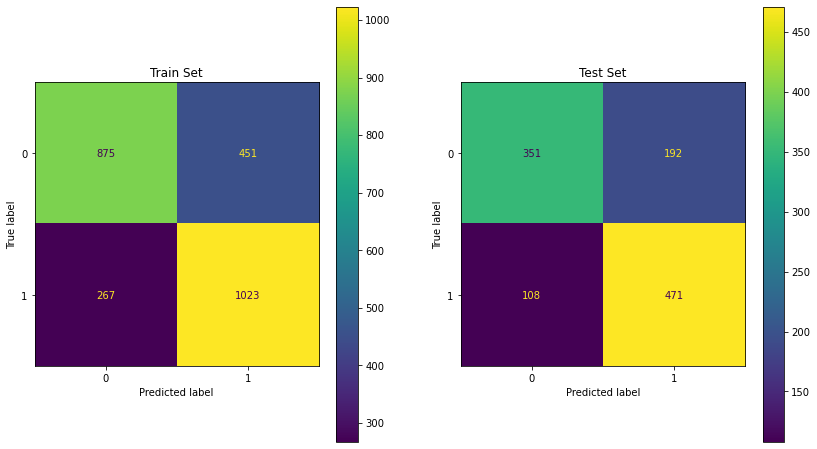

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")


In [ ]:
#After de downsampling we see an improvement in Accuracy, Precision and Recall
#0	Accuracy	0.791684	0.766209
#1	Precision	0.656716	0.633333
#2	Recall	0.412823	0.38644

In [57]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.70801527, 0.72275335, 0.68642447, 0.72657744, 0.69407266])

###  ChurnData3 (Upsampling)

In [58]:
#Define the target variable before de scale
X=churnData3.drop('Churn', axis=1)
y=churnData3.Churn

#Train-Test split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [59]:
churnData3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
5542,0,67,86.15,5883.85,0
1453,0,31,94.50,2979.20,0
319,0,35,91.50,3236.35,0
932,0,72,19.30,1304.80,0
2740,0,1,44.40,44.40,1
...,...,...,...,...,...
4101,0,6,59.15,336.70,0
3095,0,11,84.80,888.75,0
1071,0,2,49.05,91.10,1
2829,1,8,69.70,560.85,1


,Error_metric,Train,Test
0,Accuracy,0.724838,0.723671
1,Precision,0.695967,0.693370
2,Recall,0.797013,0.805520


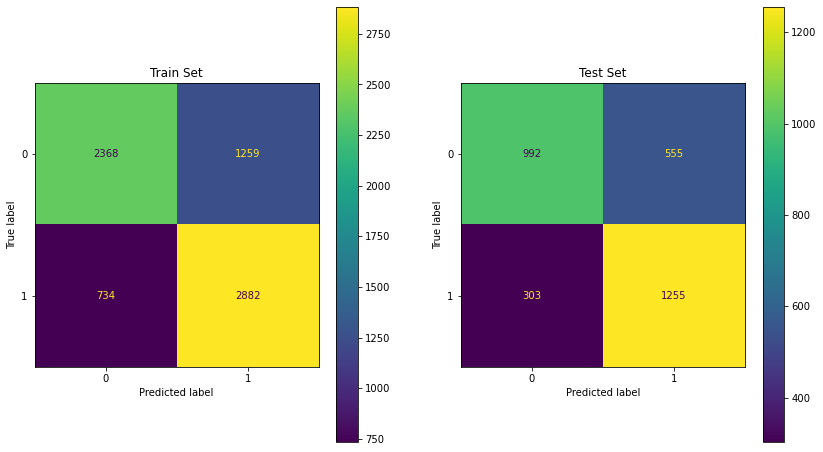

In [60]:
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [61]:
# After the upsampling we can see an improvement in Accuracy and Recall
#0	Accuracy	0.791684	0.766209
#1	Precision	0.656716	0.633333
#2	Recall	0.412823	0.38644

In [62]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.73636991, 0.73153899, 0.72325742, 0.71823204, 0.70787293])

# Round 4 

In [101]:
churnData_forest=pd.read_csv('churnData2')
churnData_forest

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,29.85,29.85,0
1,1,0,34,56.95,1889.50,0
2,2,0,2,53.85,108.15,1
3,3,0,45,42.30,1840.75,0
4,4,0,2,70.70,151.65,1
...,...,...,...,...,...,...
7038,7038,0,24,84.80,1990.50,0
7039,7039,0,72,103.20,7362.90,0
7040,7040,0,11,29.60,346.45,0
7041,7041,1,4,74.40,306.60,1


## Random forest (Downsampling)

### We start  balancing the data 

In [113]:
churnData_forest['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [114]:
category_0 = churnData2[churnData2['Churn']==0].sample(len(churnData2[churnData2['Churn']==1]))
category_0.shape

(1869, 5)

In [115]:
category_1 = churnData2[churnData2['Churn']== 1 ]
data = pd.concat([category_0, category_1], axis = 0)
data = data.sample(frac =1)
data = data.reset_index(drop=True)
data.shape

(3738, 5)

In [116]:
print(category_0.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [106]:
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1,8,92.10,729.95,1
1,0,33,88.60,2888.70,0
2,0,1,50.80,50.80,1
3,0,29,75.35,2243.90,0
4,1,20,85.80,1727.50,1
...,...,...,...,...,...
3733,0,7,86.50,582.50,1
3734,0,38,105.00,4026.40,1
3735,0,47,54.25,2538.20,0
3736,0,4,88.45,370.65,1


### X Y split

In [107]:
X = data.drop(['Churn'], axis = 1)
y = data['Churn']


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Application of Random forest classifier

In [109]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7645379950053514
0.7497326203208556


In [93]:
#highest cross validation score (Downsampling)
#Train:0.725535
#Test:0.732620

#The accuracy is improved in both cases

In [70]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(max_depth=3,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

array([0.74331551, 0.73262032, 0.76292335, 0.68035714, 0.75      ])

In [72]:
#K-fold downsampling: 0.70801527, 0.72275335, 0.68642447, 0.72657744, 0.69407266
#K-fold upsampling:   0.73636991, 0.73153899, 0.72325742, 0.71823204, 0.70787293


## Random forest (SMOTE upsampling)

### Balancing the data (upsampling)

In [111]:
churnData_forest2=pd.read_csv('churnData2')
churnData_forest2

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,29.85,29.85,0
1,1,0,34,56.95,1889.50,0
2,2,0,2,53.85,108.15,1
3,3,0,45,42.30,1840.75,0
4,4,0,2,70.70,151.65,1
...,...,...,...,...,...,...
7038,7038,0,24,84.80,1990.50,0
7039,7039,0,72,103.20,7362.90,0
7040,7040,0,11,29.60,346.45,0
7041,7041,1,4,74.40,306.60,1


In [123]:
 install -c conda-forge imbalanced-learn
 install -c glemaitre imbalanced-learn

SyntaxError: invalid syntax (3812008008.py, line 1)

In [121]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
y = churnData_forest2['Churn']
X = churnData_forest2.drop(['Churn'], axis=1)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

ModuleNotFoundError: No module named 'imblearn'